# <img style="float: left; padding-right: 10px; width: 200px" src="https://fligoo.com/img/logo-large.png"> Fligoo - Credit Risk

Tech Interview for Data Scientist

<hr style="height:2pt">

## Motivation

Credit risk is most simply defined as the potential that a bank borrower or counterparty will fail to meet its obligations in accordance with agreed terms. The goal of credit risk management is to maximise a bank's risk-adjusted rate of return by maintaining credit risk exposure within acceptable parameters. Banks need to manage the credit risk inherent in the entire portfolio as well as the risk in individual credits or transactions. 

## Description

The following dataset has 150.000 records of borrowers taken from an anonymous bank, which are described through 12 different columns.

The goal of this test is to perform an Exploratory Data Analysis (EDA) on this dataset, to understand the information contained and obtain insights that could be relevant to solve a business problem and develop a simple model that could predict the risk.

You can find the data in this [link](https://s3-us-west-2.amazonaws.com/fligoo.data-science/TechInterviews/CreditEDA/data/credit-data.csv)

Below is a description of the involved columns:

| Variable Name | Description | 
| ------------- | ----------- |
| unnamed:0 | ID of borrower |
| serious_dlqin2yrs | Person experienced 90 days past due delinquency or worse |
| revolving_utilization_of_unsecured_lines | Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits |
| age | Age of borrower in years | 
| number_of_time30-59_days_past_due_not_worse | Number of times borrower has been 30-59 days past due but no worse in the last 2 years |
| debt_ratio | Monthly debt payments, alimony, living costs divided by monthy gross income |
| monthly_income | Monthly income |
| number_of_open_credit_lines_and_loans | Number of open loans (installment like car loan or mortgage) and lines of credit (e.g. credit cards) |
| number_of_times90_days_late | Number of times borrower has been 90 days or more past due |
| number_real_estate_loans_or_lines | Number of mortgage and real estate loans including home equity lines of credit |
| number_of_time60-89_days_past_due_not_worse | Number of times borrower has been 60-89 days past due but no worse in the last 2 years |
| number_of_dependents | Number of dependents in family excluding themselves (spouse, children etc.) |


Please **read carefully** all the assignments to guide the work that is expected to find in this notebook.

## Goal

In this notebook you have to load all the libraries you need to explore and process the given dataset, and then perform the analysis to extract meaningful facts in order to understand the information involved. You are free to make any kind of analytic you want, but at the end it is expected to have done the "mandatory" tasks on this work. In addition, there are some "nice to have" aspects that would enrich the work done.

> Please provide reports in English and focus on findings and insights

**Stack of technologies:** The analysis on this notebook should be done by using at least the following stack:   
    - Python 3.x (not 2.x)
    - Pandas 1.0.x

### Assignment

- **Report insights and conclusions:** Describe the results obtained during the exploratory analysis and provide conclusions from a business perspective, supported by charts / tables / metrics. 
- **Data Quality Check:** You must check the quality of the given dataset to make an assessment of how appropriate it is for later Data Science tasks. Propose a set of corrective actions over the data.     
   
- **Feature extraction:** Indicate some possible candidates of features that could properly describe the borrowers, either from the given columns or from their transformations.
- **Machine Learning modeling:** at least one fitted model with the given data. You could use the `serious_dlqin2yrs` column as target.


### Nice to have aspects

- Dockerfile to setup environment.
- Identify features and new attributes / tables that could be relevant or needed for better analysis
- **Code versioning with Git** (you are free to publish it on your own Github/Bitbucket account!).
- **Show proficiency in Python:** By showing good practices in the structure and documentation, usage of several programming paradigms (e.g. imperative, OOP, functional), etc.
- **Use cases:** Describe possible use cases for this dataset that could add value to the given business, indicating methods / techniques and algorithms for each of them and justifying the choice made.
- **Machine Learning approaches:** Describe the possible Machine Learning tasks that could be performed from the given data, which may be valuable in the context of the finance domain (just explain with words, don't fit a model).

Once you complete the assessment, please send a ZIP file of the folder with all the resources used in this work (e.g. Jupyter notebook, Python scripts, text files, images, etc) to esteban.delboca@fligoo.com. Then you are going to have a final meeting with the team to discuss the work done in this notebook and answer the questions that could arise.

**Have fun!**

![Have fun](https://media1.tenor.com/images/8d13f337a8c6e5aab8ba1bd8acd4da0c/tenor.gif?itemid=5304821)

## Tech Interview - Yanina Vanesa Iberra

### 1. Data Analysis

- Check pandas library version installed

In [1]:
import pandas as pd

print(pd.__version__)

1.0.5


- Check Python version installed

In [2]:
import sys

print(sys.version)

3.6.8 |Anaconda, Inc.| (default, Feb 21 2019, 18:30:04) [MSC v.1916 64 bit (AMD64)]


- **Import the necessary libraries**

In [3]:
# Command that will allow to see a graphic in this notebook below the line of code that invokes it.
%matplotlib inline

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- **Reading the CSV data file using pandas** <br> <br>
File separated by comma, de default read_csv function delimiter is comma, therefore, this parameter is omitted.

In [5]:
borrowers = pd.read_csv('https://s3-us-west-2.amazonaws.com/fligoo.data-science/TechInterviews/CreditEDA/data/credit-data.csv')

- **Get an overview of the dataset**

Let's inspect the first 10 rows of `borrowers` using the` .head () `function.

In [6]:
borrowers.head(10)

,unnamed: 0,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,0.0
9,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


Let's inspect the last 10 rows of `borrowers` using the` .head () `function.

In [7]:
borrowers.tail(10)

,unnamed: 0,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
149990,149991,0,0.055518,46,0,0.609779,4335.0,7,0,1,0,2.0
149991,149992,0,0.104112,59,0,0.477658,10316.0,10,0,2,0,0.0
149992,149993,0,0.871976,50,0,4132.000000,NaN,11,0,1,0,3.0
149993,149994,0,1.000000,22,0,0.000000,820.0,1,0,0,0,0.0
149994,149995,0,0.385742,50,0,0.404293,3400.0,7,0,0,0,0.0
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0
149999,150000,0,0.850283,64,0,0.249908,8158.0,8,0,2,0,0.0


- **Delete row Unnamed: 0**

In [8]:
borrowers.drop('unnamed: 0', axis=1, inplace=True)

In [9]:
borrowers.head(10)

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,0,0.116951,27,0,46.000000,NaN,2,0,0,0,0.0
9,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


- **Let's see how many rows and columns `borrowers` has.**

In [10]:
row, col = borrowers.shape

print(f"Borrowers dataframe rows: {row}")

print(f"Borrowers dataframe columns: {col}")

Borrowers dataframe rows: 150000
Borrowers dataframe columns: 11


- **Let's see what kind of data structure the variable `borrowers` contains.**

In [11]:
type(borrowers)

pandas.core.frame.DataFrame

- **Let's see what types of data each of the `borrowers` columns contain**

In [12]:
borrowers.dtypes

serious_dlqin2yrs                                int64
revolving_utilization_of_unsecured_lines       float64
age                                              int64
number_of_time30-59_days_past_due_not_worse      int64
debt_ratio                                     float64
monthly_income                                 float64
number_of_open_credit_lines_and_loans            int64
number_of_times90_days_late                      int64
number_real_estate_loans_or_lines                int64
number_of_time60-89_days_past_due_not_worse      int64
number_of_dependents                           float64
dtype: object

There are no categorical variables.

- The info() method of pandas.DataFrame can display information such as the number of rows and columns, the total memory usage, the data type of each column, and the number of non-NaN elements.

In [13]:
borrowers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   serious_dlqin2yrs                            150000 non-null  int64  
 1   revolving_utilization_of_unsecured_lines     150000 non-null  float64
 2   age                                          150000 non-null  int64  
 3   number_of_time30-59_days_past_due_not_worse  150000 non-null  int64  
 4   debt_ratio                                   150000 non-null  float64
 5   monthly_income                               120269 non-null  float64
 6   number_of_open_credit_lines_and_loans        150000 non-null  int64  
 7   number_of_times90_days_late                  150000 non-null  int64  
 8   number_real_estate_loans_or_lines            150000 non-null  int64  
 9   number_of_time60-89_days_past_due_not_worse  150000 non-nul

**Descriptive Statistics** <br> <br>
Describe the all dataset statistical properties.

In [14]:
borrowers[borrowers.columns[1:]].describe()

,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
count,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.737413
std,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.107021
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


**Observations**:
- There are 150000 cases in dataset.
- Out of 11 variables available, `serious_dlqin2yrs` is the binary dependent variable for which model has to be developed.
- `monthly_income` has large number of missing values.
- There are high numbers of extreme values(outliers) for `revolving_utilization_of_unsecured_lines`, `debt_ratio` and `monthly_income` as indicated by high Standard Deviation.
- `age` variable have one case showing 0.

**Calculation of what percentage of values each possible value of the target variable `serious_dlqin2yrs` has.**

In [15]:
target_len = len(borrowers['serious_dlqin2yrs'])
percentage_var = (borrowers['serious_dlqin2yrs'].value_counts()/target_len)*100
percentage_var

0    93.316
1     6.684
Name: serious_dlqin2yrs, dtype: float64

Graph of the percentages for each possible target value.

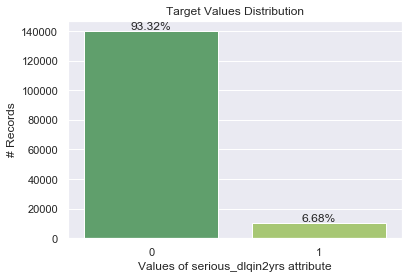

In [16]:
sns.set()
sns.countplot(borrowers.serious_dlqin2yrs, palette='summer').set_title('Target Values Distribution')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.2f}%'.format(100*(height/target_len)),
            fontsize=12, ha='center', va='bottom')
ax.set_xlabel("Values of serious_dlqin2yrs attribute")
ax.set_ylabel("# Records")
plt.show()

**Observation:** <br><br>
Disproportionate percentage of samples for dependent variable. Sampling of training dataset required to remove bias in model development.

### 2. Data Pre- Processing

#### 2.1 Missing Value Analysis

.isnull (). Returns a new DataFrame in which we will have the value False if it is not missing and True if that value is missing.

In [17]:
borrowers.isnull()

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
149995,False,False,False,False,False,False,False,False,False,False,False
149996,False,False,False,False,False,False,False,False,False,False,False
149997,False,False,False,False,False,True,False,False,False,False,False
149998,False,False,False,False,False,False,False,False,False,False,False


In [18]:
borrowers.isna() #another option

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
149995,False,False,False,False,False,False,False,False,False,False,False
149996,False,False,False,False,False,False,False,False,False,False,False
149997,False,False,False,False,False,True,False,False,False,False,False
149998,False,False,False,False,False,False,False,False,False,False,False


We can however combine this function with others in order to obtain the total number of missing data. For example, we can use .isnull().sum(). <br> These numbers return the number of missing values in each column.

In [19]:
print(f"Missing values in each attribute: \n{borrowers.isnull().sum()}")

Missing values in each attribute: 
serious_dlqin2yrs                                  0
revolving_utilization_of_unsecured_lines           0
age                                                0
number_of_time30-59_days_past_due_not_worse        0
debt_ratio                                         0
monthly_income                                 29731
number_of_open_credit_lines_and_loans              0
number_of_times90_days_late                        0
number_real_estate_loans_or_lines                  0
number_of_time60-89_days_past_due_not_worse        0
number_of_dependents                               0
dtype: int64


Graphical representation of the missing values.

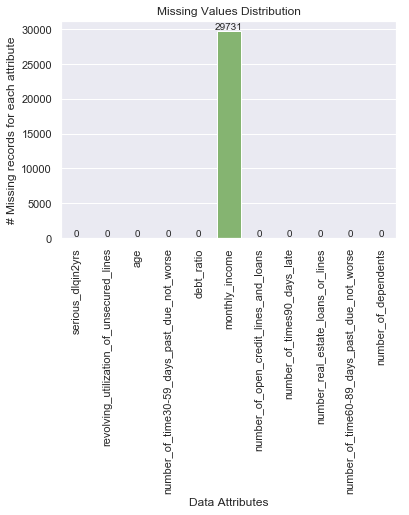

In [20]:
x = borrowers.columns
y = borrowers.isnull().sum()
sns.set()
sns.barplot(x,y, palette='summer').set_title('Missing Values Distribution')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            int(height),
            fontsize=10, ha='center', va='bottom')
ax.set_xlabel("Data Attributes")
ax.set_ylabel("# Missing records for each attribute")
plt.xticks(rotation=90)
plt.show()

Let's see the lost values in percentages.

In [21]:
print(f"Missing values in each attribute: \n{borrowers.isnull().sum() / row * 100}")

Missing values in each attribute: 
serious_dlqin2yrs                               0.000000
revolving_utilization_of_unsecured_lines        0.000000
age                                             0.000000
number_of_time30-59_days_past_due_not_worse     0.000000
debt_ratio                                      0.000000
monthly_income                                 19.820667
number_of_open_credit_lines_and_loans           0.000000
number_of_times90_days_late                     0.000000
number_real_estate_loans_or_lines               0.000000
number_of_time60-89_days_past_due_not_worse     0.000000
number_of_dependents                            0.000000
dtype: float64


**Observations:**

- `monthly_income` attribute has large number of missing values. We can see that the variable has 29731 null values. And this represent the 20% approx.
- We can eliminate all the rows that have missing values, but this requires an analysis of the amount of missing data and its impact first. <br>
- From our intuition, we know that `monthly_income` is an important predictor for credit scoring, therefore we won’t drop those data-points and find the best strategy to replace NULL values.<br>
- It may be necessary to complete some of them with one of the following methods: mean, median, mode, k-nearest neighbor.
<br><br>
Let's see some statistical details of `monthly_income` column of a DataFrame using the .describe () function.

In [22]:
borrowers['monthly_income'].describe()

count    1.202690e+05
mean     6.670221e+03
std      1.438467e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.249000e+03
max      3.008750e+06
Name: monthly_income, dtype: float64

In [23]:
borrowers_median = borrowers['monthly_income'].median()
borrowers_median

5400.0

In [24]:
borrowers_mean = borrowers['monthly_income'].mean()
borrowers_mean

6670.221237392844

**We will test the whole process with a new dataframes with null values replaced by the mean.**

In [25]:
# Reemplazar ésta parte por el uso de 
# from sklearn.impute import SimpleImputer

In [26]:
borrowers_with_mean= borrowers.apply(lambda x: x.fillna(x.mean()),axis=0)

**Verify that there are no more null values.**

In [27]:
borrowers_with_mean.isnull().sum()

serious_dlqin2yrs                              0
revolving_utilization_of_unsecured_lines       0
age                                            0
number_of_time30-59_days_past_due_not_worse    0
debt_ratio                                     0
monthly_income                                 0
number_of_open_credit_lines_and_loans          0
number_of_times90_days_late                    0
number_real_estate_loans_or_lines              0
number_of_time60-89_days_past_due_not_worse    0
number_of_dependents                           0
dtype: int64

The number of records has not been changed.

In [28]:
borrowers_with_mean.shape

(150000, 11)

The original dataframe was not modified.

In [29]:
borrowers.isnull().sum()

serious_dlqin2yrs                                  0
revolving_utilization_of_unsecured_lines           0
age                                                0
number_of_time30-59_days_past_due_not_worse        0
debt_ratio                                         0
monthly_income                                 29731
number_of_open_credit_lines_and_loans              0
number_of_times90_days_late                        0
number_real_estate_loans_or_lines                  0
number_of_time60-89_days_past_due_not_worse        0
number_of_dependents                               0
dtype: int64

#### 2.2 Outliers Detection

- **`age` attribute**

The `age` variable has a record with value '0', as it is a single record we decided to eliminate it.

In [30]:
borrowers_with_mean.drop(borrowers_with_mean[borrowers_with_mean.age == 0].index, inplace=True)

- **`number_of_time30-59_days_past_due_not_worse` attribute**

The `number_of_time30-59_days_past_due_not_worse` variable has a record with value '96' and '98', we replace them with the median value.

In [31]:
import collections

In [32]:
collections.Counter(borrowers_with_mean['number_of_time30-59_days_past_due_not_worse'])

Counter({2: 4598,
         0: 126018,
         1: 16032,
         3: 1754,
         4: 747,
         5: 342,
         7: 54,
         10: 4,
         6: 140,
         98: 264,
         12: 2,
         8: 25,
         9: 12,
         96: 5,
         13: 1,
         11: 1})

In [33]:
def outlier_days_past_due_not_worse(attribute):
    New = []
    med = borrowers_with_mean[attribute].median()
    for val in borrowers_with_mean[attribute]:
        if ((val == 98) | (val == 96)):
            New.append(med)
        else:
            New.append(val)
    borrowers_with_mean[attribute] = New
    #return borrowers_with_mean

In [34]:
outlier_days_past_due_not_worse('number_of_time30-59_days_past_due_not_worse')

In [35]:
collections.Counter(borrowers_with_mean['number_of_time30-59_days_past_due_not_worse'])

Counter({2.0: 4598,
         0.0: 126287,
         1.0: 16032,
         3.0: 1754,
         4.0: 747,
         5.0: 342,
         7.0: 54,
         10.0: 4,
         6.0: 140,
         12.0: 2,
         8.0: 25,
         9.0: 12,
         13.0: 1,
         11.0: 1})

Apply the same function to the other attributes of type "days_past_due_not_worse".

In [36]:
outlier_days_past_due_not_worse('number_of_times90_days_late')

In [37]:
outlier_days_past_due_not_worse('number_of_time60-89_days_past_due_not_worse')

In [38]:
collections.Counter(borrowers_with_mean['number_of_times90_days_late'])

Counter({0.0: 141930,
         1.0: 5243,
         3.0: 667,
         2.0: 1555,
         5.0: 131,
         4.0: 291,
         10.0: 8,
         9.0: 19,
         6.0: 80,
         7.0: 38,
         8.0: 21,
         15.0: 2,
         11.0: 5,
         13.0: 4,
         14.0: 2,
         17.0: 1,
         12.0: 2})

In [39]:
collections.Counter(borrowers_with_mean['number_of_time60-89_days_past_due_not_worse'])

Counter({0.0: 142664,
         1.0: 5731,
         2.0: 1118,
         5.0: 34,
         3.0: 318,
         4.0: 105,
         6.0: 16,
         7.0: 9,
         8.0: 2,
         11.0: 1,
         9.0: 1})

**Descriptive Statistics After Data Cleaning**

In [40]:
borrowers_with_mean.describe()

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
count,149999.000000,149999.000000,149999.000000,149999.000000,149999.000000,1.499990e+05,149999.000000,149999.000000,149999.000000,149999.000000,149999.000000
mean,0.066840,6.048472,52.295555,0.245348,353.007426,6.670226e+03,8.452776,0.090294,1.018233,0.064707,0.737405
std,0.249746,249.756203,14.771298,0.697231,2037.825113,1.288049e+04,5.145964,0.485108,1.129772,0.329790,1.107020
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.903000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154176,52.000000,0.000000,0.366503,6.600000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559044,63.000000,0.000000,0.868257,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,13.000000,329664.000000,3.008750e+06,58.000000,17.000000,54.000000,11.000000,20.000000


- After data cleaning total number of cases down to 149999.
- The minimum value of the `age` attribute is no longer `0` but `21`.
- Outliers in variables `revolving_utilization_of_unsecured_lines`, `debt_ratio` and `monthly_income` to be removed through binning.

**Let's see if some of the variables have values that can be described as outliers (attributes with high Standard Deviation).

- **`revolving_utilization_of_unsecured_lines` attribute outliers**

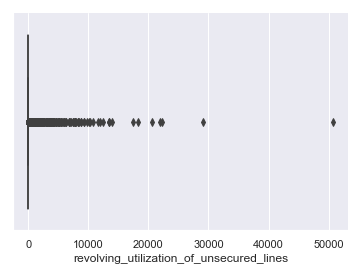

In [41]:
sns.boxplot(x='revolving_utilization_of_unsecured_lines', data=borrowers_with_mean, color='#1ABC9C')
sns.despine()

- **`debt_ratio` attribute outliers**

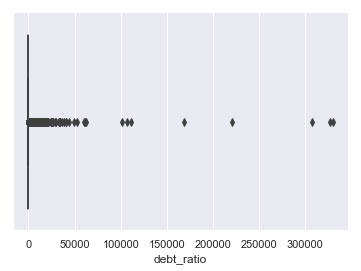

In [42]:
sns.boxplot(x='debt_ratio', data=borrowers_with_mean, color='#1ABC9C')
sns.despine()

- **`monthly_income` attribute outliers**

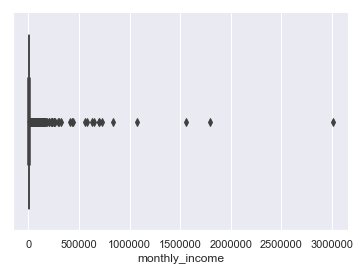

In [43]:
sns.boxplot(x='monthly_income', data=borrowers_with_mean, color='#1ABC9C')
sns.despine()

- Way to decrease outliers:
    - z-score
        - Consider that any value that is far from the average=0 is an outlier.
        - It depends on the mean and the standard deviation to measure centrality and dispersion, which are very affected by outliers. If the variables do not have a normal distribution, I end up removing many outliers from the dataset.
        - It does not work well in very small datasets.
    - Interquartile range: 
        - It is robust and not as sensitive to outliers.

In [44]:
from scipy import stats

In [45]:
z = np.abs(stats.zscore(borrowers_with_mean))
print(z)

[[3.73644234 0.02115008 0.49390241 ... 4.40954773 0.19620791 1.14053851]
 [0.26763426 0.02038523 0.83239782 ... 0.90127648 0.19620791 0.2372097 ]
 [0.26763426 0.02158228 0.96779599 ... 0.90127648 0.19620791 0.6661191 ]
 ...
 [0.26763426 0.02323244 0.38618568 ... 0.01613911 0.19620791 0.6661191 ]
 [0.26763426 0.02421758 1.50938866 ... 0.90127648 0.19620791 0.6661191 ]
 [0.26763426 0.02081312 0.79238018 ... 0.86899826 0.19620791 0.6661191 ]]


In [53]:
threshold = 3
print(np.where(z > 2.5))

(array([     0,      0,      0, ..., 149977, 149978, 149980], dtype=int64), array([ 0,  3,  8, ...,  3,  0, 10], dtype=int64))


In [54]:
borrowers_with_mean_o = borrowers_with_mean[(z < 2.5).all(axis=1)]

In [55]:
borrowers_with_mean_o.describe()

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
count,120492.0,120492.000000,120492.000000,120492.000000,120492.000000,120492.000000,120492.000000,120492.000000,120492.000000,120492.0,120492.000000
mean,0.0,0.346679,52.896018,0.091492,292.702327,6281.865929,7.994771,0.018649,0.908849,0.0,0.618265
std,0.0,5.362397,14.894519,0.288308,820.863757,3752.713470,4.371158,0.135281,0.861305,0.0,0.928862
min,0.0,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.0,0.024323,42.000000,0.000000,0.165701,3900.000000,5.000000,0.000000,0.000000,0.0,0.000000
50%,0.0,0.114685,53.000000,0.000000,0.352152,6521.000000,7.000000,0.000000,1.000000,0.0,0.000000
75%,0.0,0.437138,63.000000,0.000000,0.862599,7175.000000,11.000000,0.000000,2.000000,0.0,1.000000
max,0.0,616.000000,89.000000,1.000000,5446.000000,38583.000000,21.000000,1.000000,3.000000,0.0,3.000000


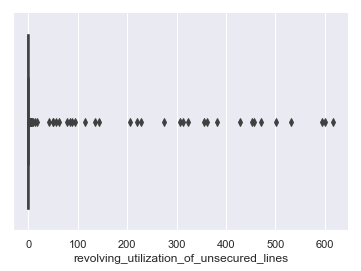

In [56]:
sns.boxplot(x='revolving_utilization_of_unsecured_lines', data=borrowers_with_mean_o, color='#1ABC9C')
sns.despine()

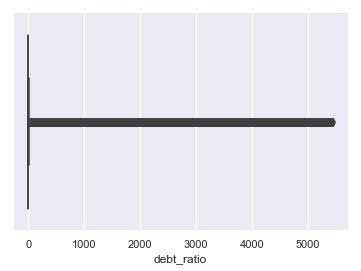

In [58]:
sns.boxplot(x='debt_ratio', data=borrowers_with_mean_o, color='#1ABC9C')
sns.despine()

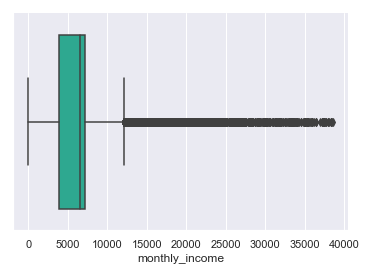

In [59]:
sns.boxplot(x='monthly_income', data=borrowers_with_mean_o, color='#1ABC9C')
sns.despine()

**Variable Binning**

- Age: Age Binning containing bins for age group

| Age Group | Bin | 
| --- | --- |
| 21-30 | 1 |
| 31-40 | 2 |
| 41-50 | 3 |
| 51-60 | 4 |
| > 60 | 5 |


- DebtRatio & RevolvingUtilizationOfUnsecuredLines: Created variables DebtRatio_Binning and RevolvingUtilizationOfUnsecuredLines_Binning with following cut off values:

| Group | Bin | Remark |
| --- | --- |  --- |
| <=0.25  | 1 |  Good |
| 0.25 - 0.50  | 2 |  Low Risk |
| > 0.50 | 3 |  High Risk |


- MonthlyIncome: Variable MonthlyIncome_Binning with 5 equal width bins

### Exploratory Analysis

### Delinquency over different categories

**a) Age**

In [49]:
Age_Binning * SeriousDlqin2yrs Crosstabulation

# Hacer gráfico Age vs Delinquency

SyntaxError: invalid syntax (<ipython-input-49-bf65e700db4b>, line 1)

**Observations:**
- Maximum borrowers from age group 60+
- Delinquency risk is highest for age group of 41-50 and Lowest in 21-30 age group.

**b) Number of Dependents**

In [ ]:
NumberOfDependents * SeriousDlqin2yrs Crosstabulation

**Observations:**
- Around 60% data have number of dependents as 0; Delinquency count and percentage also highest for this group.
- Total percentage share of data with dependents greater than 3 is only around 2%.

**c) Debt Ratio**

In [ ]:
DebtRatio (Binned) * SeriousDlqin2yrs Crosstabulation

**Observations:**
- Around 44% of Delinquency from group with Debt Ratio > 0.5

**d) RevolvingUtilizationOfCreditLines**

In [ ]:
RevolvingUtilizationOfUnsecuredLines (Binned) * SeriousDlqin2yrs Crosstabulation

**Observations:**
- Around 69% of Delinquency from group with RevolvingUtilizationOfCreditLines > 0.5

**e) Monthly Income**

In [ ]:
MonthlyIncome (Binned) * SeriousDlqin2yrs Crosstabulation

**Observations:**
- More than 50% of defaulters are accounted by lower 40% of the income range.
- Other 3 groups have more or less same percentage of defaulters.

In [ ]:
Monthly Income vs. Other Financial Variables # GRAFICAR

All parameters below have similar pattern: low income range attributing to high values of debt indicators.
    
i) RevolvingUtilizationOfUnecuredLines, <br>
ii) DebtRatio, <br>
iii) NumberOfTime30-59DaysPastDueNotWorse,  <br>
iv) NumberOfTimes90DaysLate,  <br>
v) NumberOfTime60-089DaysPastDueNotWorse,  <br>
vi) NumberOfOpenCreditLinesAndLoans,  <br>
vii) NumberOfRealEstateLoansOrLines

**Comparison of the distributions of the three dataframes without null values**

In [ ]:
sns.distplot(borrowers_dropna['monthly_income'], color='#1ABC9C', label='Without null Values', bins=1)
sns.distplot(borrowers_with_mean['monthly_income'], color='#EB984E', label='With mean replacing null values', bins=1)
sns.distplot(borrowers_with_median['monthly_income'], color='#F4D03F', label='With mean replacing null values', bins=1)
plt.xlabel('Monthly Income', size=14)
plt.legend()
sns.despine()

In [ ]:
borrowers_dropna['monthly_income'].describe()

In [ ]:
plt.figure()
sns.distplot(borrowers_dropna["monthly_income"], color="#5ea88e", bins=1)
plt.xlabel('monthly_income')
plt.ylabel('Frequency')
sns.despine()
plt.show()

In [ ]:
borrowers_dropna['monthly_income'].plot()

In [ ]:
borrowers['age'].describe()

In [ ]:
plt.figure()
sns.distplot(borrowers_dropna["age"], color="#5ea88e", bins=1)
plt.xlabel('monthly_income')
plt.ylabel('Frequency')
sns.despine()
plt.show()

In [ ]:
def histograma(variable, color):
    plt.figure()
    name = variable.name
    plt.hist(variable, color=color, alpha=0.5, bins=20)
    plt.xlabel(name)
    plt.ylabel('Events')
    plt.title(f'Distribucion de la variable {name}')
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.show()

In [ ]:
histograma(borrowers_dropna['age'], color="#cf7c17")

In [ ]:
plt.figure()
sns.distplot(borrowers_dropna['age'], color="#5ea88e", bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
sns.despine()
plt.show()

In [ ]:
corr = borrowers_dropna[['serious_dlqin2yrs', 'revolving_utilization_of_unsecured_lines', 'age', 'number_of_time30-59_days_past_due_not_worse', 'number_of_time60-89_days_past_due_not_worse', 'number_of_times90_days_late', 'debt_ratio', 'monthly_income', 'number_of_open_credit_lines_and_loans', 'number_real_estate_loans_or_lines', 'number_of_dependents']].corr(method = 'pearson')

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(corr, cmap='YlGnBu', annot=True);

There is a high correlation between:
- `number_of_time30-59_days_past_due_not_worse`, `number_of_time60-89_days_past_due_not_worse` and `number_of_times90_days_late` variables.
- `number_of_open_credit_lines_and_loans` and `number_real_estate_loans_or_lines` variables.

*** ¿Podría sumarizar esas variables en sólo dos? Obteniendo "days_past_due_not_worse" en el primer caso y "numbres_of_loans_or_lines" en el segundo ***

### 2. Outliers Detection

Let's see if some of the variables have values that can be described as outliers.

In [ ]:
sns.distplot(borrowers_dropna['number_of_dependents'])
sns.despine()

In [ ]:
sns.boxplot(x='number_of_dependents', data=borrowers_dropna, color='#1ABC9C')
sns.despine()

- Way to decrease outliers:
    - z-score
        - Consider that any value that is far from the average=0 is an outlier.
        - It depends on the mean and the standard deviation to measure centrality and dispersion, which are very affected by outliers. If the variables do not have a normal distribution, I end up removing many outliers from the dataset.
        - It does not work well in very small datasets.
    - Interquartile range: 
        - It is robust and not as sensitive to outliers.

**Variable Binning**

- Age: Age Binning containing bins for age group

| Age Group | Bin | 
| --- | --- |
| 21-30 | 1 |
| 31-40 | 2 |
| 41-50 | 3 |
| 51-60 | 4 |
| > 60 | 5 |


- DebtRatio & RevolvingUtilizationOfUnsecuredLines: Created variables DebtRatio_Binning and RevolvingUtilizationOfUnsecuredLines_Binning with following cut off values:

| Age Group | Bin | Remark |
| --- | --- |  --- |
| <=0.25  | 1 |  Good |
| 0.25 - 0.50  | 2 |  Low Risk |
| > 0.50 | 3 |  High Risk |


- MonthlyIncome: Variable MonthlyIncome_Binning with 5 equal width bins

### 3. Discovering new variables

- The way to combine variables already present that can capture dependent effects between the two and affect the outcome is:
    - Adding or subtracting variables
    - Multiplying or dividing variables

### 4. Variables transformation

Most machine learning algorithms do not support strings as variables and require the variables to be numerical. For that reason, it is necessary to convert the variables categories in their representation numerical. <br>
In this case there are no categorical variables.

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')

In [ ]:
bins = kbins.fit_transform(borrowers_dropna[['monthly_income']]).flatten()

In [ ]:
sns.countplot(bins, palette='summer')
sns.despine()

In [ ]:
kbins.bin_edges_

### 5. Data standardization

There are two methods to standardize or rescale variables: `StandardScaler` which uses z-score and `MinMaxScaler` which rescales the data linearly.

### 6. Machine Learning Model

#### Target (y) and variables (X) selection

Using the variable `serious_dlqin2yrs` as a target.

In [ ]:
borrowers_dropna2 = borrowers_dropna

Remove those variables that I do not want to include in the model and save them in `x` variable.

In [ ]:
x = borrowers_dropna2.drop(['number_of_time30-59_days_past_due_not_worse', 'number_of_times90_days_late', 'number_real_estate_loans_or_lines'], 
                  axis=1)

In [ ]:
lista_atributos = x.columns

In [ ]:
# Ahora selecciono las etiquetas y las guardo en y.
y = borrowers_dropna2['serious_dlqin2yrs']

In [ ]:
x, y = np.array(x), np.array(y)

#### Separating dataset in Train / Test sets

The way the data is normally divided is 80% training -20% evaluation.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, 
                                                    random_state = 42)

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor 

In [ ]:
from sklearn.metrics import mean_absolute_error

Initialize the model.

In [ ]:
regresor = RandomForestRegressor(criterion='mae', random_state = 42)

Train the model

In [ ]:
regresor.fit(X_train, y_train);

In [ ]:
regresor.get_params()

#### Model evaluation

We use a regression algorithm, so we will use the errors to be able to evaluate the performance of our model. First, we will create some functions that will allow us to obtain the errors easily and to graph the results.

In [ ]:
def evaluation(y_test, predictions):
    """
    Funcion que devuelve el error absoluto medio y el error porcentual absoluto medio.
    
    :param y_test: valores reales
    :param predictions: valores predichos
    
    :return: Devuelve el error absoluto medio y el error porcentual absoluto medio.
    """
    # Calcula mae 
    mae = mean_absolute_error(y_test, predictions)
    #calculate mape 
    mape = np.mean((np.abs(y_test - predictions)/y_test)*100)
    #print calculated values
    print(f"El error absoluto medio para el modelo es {round(mae, 2)}")
    print(f"El error porcentual absoluto medio para el modelo es {round(mape, 2)}")

In [ ]:
def graph_real_pred(y_test, predictions, color):
    """
    Funcion que grafica los valores reales vs. predichos
    :param y_test: valores reales
    :param predictions: valores predichos
    :param color: color para el plot.
    
    :return: Scatterplot mostrando la relacion entre el valor real y el predicho
    """
    plt.scatter(y_test, predictions, c=color, s=10)    
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.xlabel('Real', size=15, labelpad=1)
    plt.ylabel('Predicted', size=15, labelpad=1)
    plt.show()

In [ ]:
def feature_importance(model, feature_list):
    """
    Function that gets and plots the feature importance
    for the given model
    :param model: the model to evaluaate
    :param feature_list: a list of features contained in the model

    :returns a plot with feature importance
    """
    # Obtiene la lista de importancias 
    importances = list(model.feature_importances_)
    # Junta los nombres de los atributos y las importancias
    feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
    # Ordena por orden de importancia
    feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
    # Print la lista de importancias
    [print('Variable: {} Importance: {}'.format(*pair)) for pair in feature_importances];
    # Colores
    colors = cm.rainbow(np.linspace(0, 1, len(feature_list)))
    
    # Caracteristicas en orden de importancia 
    characteristics = [x[0] for x in feature_importances]
    # Obtiene las importancias
    importances_plot = [x[1] for x in feature_importances]
    # Grafica un bar plot
    plt.bar(characteristics, importances_plot, color=colors)
    # Personalizamos el grafico
    plt.xticks(list(range(len(characteristics))), characteristics, rotation = 90)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gcf().subplots_adjust(bottom=0.3);

Let's evaluate the model. First, we make predictions for the evaluation set and then we compare it with the actual values.

Predicting the values for the test set.

In [ ]:
y_pred = regresor.predict(X_test)

Calculate the mean absolute error.

In [ ]:
mean_absolute_error(y_test, y_pred)

Calculate the average percentage error.

In [ ]:
np.mean((np.abs(y_test - y_pred)/y_test)*100)

Predict the values for the training set.

In [ ]:
y_pred_train = regresor.predict(X_train)

In [ ]:
mean_absolute_error(y_train, y_pred_train)

Calculate the mean percentage error for training.

In [ ]:
np.mean((np.abs(y_train - y_pred_train)/y_train)*100)

Get the importance of each feature using `feature_importances_`.

In [ ]:
for x, y in list(zip(lista_atributos,regresor.feature_importances_)):
    print(f'Atributo: {x}, Importancia: {y}') 

#### kNN classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# metricas
from sklearn.metrics import (
    roc_curve, 
    accuracy_score, 
    roc_auc_score,
    confusion_matrix, 
    precision_score, 
    recall_score, 
    f1_score
)

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
# Entrenamos el modelo
knn.fit(X_train, y_train); 

In [ ]:
# Predecimos 
predicciones_cla = knn.predict(X_test)

In [ ]:
predicciones_train = knn.predict(X_train)

In [ ]:
accuracy = accuracy_score(y_train, predicciones_train)*100
print(f'{round(accuracy, 2)}%')

In [ ]:
accuracy = accuracy_score(y_test, predicciones_cla)*100
print(f'{round(accuracy, 2)}%')

**Model optimization**

In [ ]:
ACC_train = []
ACC_test = []
vecinos = [1, 3, 5, 10, 15, 20, 25, 30]
for n in vecinos: # entreno diferentes modelos con diferntes vecinos
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    ACC_train.append(train_acc)
    y_test_pred = clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    ACC_test.append(test_acc)

In [ ]:
plt.plot(vecinos,ACC_train,'o-',label='train', color='#DCE775')
plt.plot(vecinos,ACC_test,'o-',label='test', color='#EC407A')
plt.legend() #Grafico las predicciones para el testeo y para el de entrenamiento, en el eje X está la cantidad de vecinos y en el eje y se grafica el ACCURACY. 
# Elijo donde el ACC  de entrenamienot y Testeo son parecidos, elijo 15.

In [ ]:
# Valores para los parametros a optimizar
param_grid_vec = {
    'n_neighbors': [13, 15, 17], # Busco vecinos cercanos a 15, para ver si se puede optimizar más
    'weights': ['uniform','distance'],
    'metric': ['euclidean', 'manhattan'],
}

In [ ]:
knn_search = KNeighborsClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
vecinos_search = GridSearchCV(estimator=knn_search, param_grid=param_grid_vec,
                         cv=3, verbose=2, n_jobs=-1)

In [ ]:
vecinos_search.fit(X_train, y_train)

What is our best estimator?

In [ ]:
vecinos_search.best_estimator_ # metrica mejor es la manhattan, con weights distance, n_neighbors=13

In [ ]:
vecinos_search.best_score_

In [ ]:
knn_best = vecinos_search.best_estimator_

In [ ]:
knn_best.fit(X_train, y_train)

In [ ]:
new_predictions = knn_best.predict(X_test)

**Metrics** 

Confusion matrix:

True Negative (TN)  |  False positive (FP)   
= = = = = = = = = = = = = = = = = = = = =       
False negative (FN) | True positive (TP)  


In [ ]:
plt.figure()
random_confusion = confusion_matrix(y_test, new_predictions)
sns.heatmap(random_confusion, cmap="YlGnBu",annot=True);

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, new_predictions)*100 :.2f}%")
print(f"Precision: {precision_score(y_test, new_predictions)*100 :.2f}%")
print(f"Recall: {recall_score(y_test, new_predictions)*100 :.2f}%")
print(f"F1 score: {f1_score(y_test, new_predictions)*100 :.2f}%")